In [28]:
# TUGAS BESAR 2
# IF3170 Intelegensi Buatan
# Implementasi k-Nearest Neighbor

# import module
import pandas as pd 
import scipy.stats as stats
from colorama import Fore, Back, Style
import numpy as np
from matplotlib import pyplot as plt
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
from sklearn import metrics

# membaca data dari file csv
colnames = ['battery_power', 'blue' , 'clock_speed', 'dual_sim', 'fc', 'four_g', 'int_memory', 'm_dep', 'mobile_wt',
            'n_cores', 'pc', 'px_height', 'px_width', 'ram', 'sc_h', 'sc_w', 'talk_time', 'three_g' , 'touch_screen',
            'wifi', 'price_range']
col_numeric =['battery_power', 'clock_speed', 'fc', 'int_memory', 'm_dep', 
                  'mobile_wt', 'n_cores', 'pc', 'px_height', 'px_width',
                  'ram', 'sc_h', 'sc_w', 'talk_time']
col_non_numeric = ['blue', 'dual_sim', 'four_g', 'three_g', 'touch_screen', 'wifi']

df_train = pd.read_csv("../data/data_train.csv", header=None, skiprows=1)
df_train.columns = colnames
df_validation = pd.read_csv("../data/data_validation.csv", header=None, skiprows=1)
df_validation.columns = colnames

# menampilkan data
print("\n" + Fore.CYAN + '\033[1m' + "Data Train" + '\033[0m')
display(df_train)
print("\n" + Fore.CYAN + '\033[1m' + "Data Validation" + '\033[0m')
display(df_validation)


Data Train


,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,...,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range
0,804,1,0.8,1,12,1,41,0.9,89,1,...,709,818,2027,11,5,11,1,0,0,1
1,1042,0,2.2,0,15,1,11,0.6,139,5,...,68,1018,2826,18,0,2,1,0,0,2
2,1481,1,2.0,1,0,0,35,0.5,105,3,...,249,522,2635,17,16,4,1,0,1,2
3,1104,0,1.7,0,1,1,60,0.4,199,2,...,653,1413,1229,6,0,3,1,1,1,0
4,652,0,0.5,1,1,0,58,0.6,142,3,...,464,781,565,18,12,9,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1395,536,1,1.4,0,0,1,53,0.7,135,3,...,547,705,1211,15,10,7,1,0,1,0
1396,1097,0,0.8,0,10,1,21,0.1,160,7,...,1277,1352,2219,15,6,12,1,0,1,2
1397,1179,1,0.5,0,7,1,32,0.3,182,2,...,85,1451,340,16,5,16,1,0,0,0
1398,719,1,0.5,1,0,1,23,0.4,113,6,...,431,1727,3990,14,9,12,1,1,1,3



Data Validation


,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,...,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range
0,842,0,2.2,0,1,0,7,0.6,188,2,...,20,756,2549,9,7,19,0,0,1,1
1,563,1,0.5,1,2,1,41,0.9,145,5,...,1263,1716,2603,11,2,9,1,1,0,2
2,769,1,2.9,1,0,0,9,0.1,182,5,...,248,874,3946,5,2,7,0,0,0,3
3,775,0,1.0,0,3,0,46,0.7,159,2,...,862,1864,568,17,15,11,1,1,1,0
4,595,0,0.9,1,7,1,23,0.1,121,3,...,441,810,3752,10,2,18,1,1,0,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
595,1547,1,2.9,0,2,0,57,0.4,114,1,...,347,957,1620,9,2,19,0,1,1,1
596,1882,0,2.0,0,11,1,44,0.8,113,8,...,4,743,3579,19,8,20,1,1,0,3
597,674,1,2.9,1,1,0,21,0.2,198,3,...,576,1809,1180,6,3,4,1,1,1,0
598,1965,1,2.6,1,0,0,39,0.2,187,4,...,915,1965,2032,11,10,16,1,1,1,2


In [29]:
# DATA PREPARATION

# Feature Selection
def select_features(data, target_column, threshold, feature_to_exclude=None):
    correlations = data.corr()[target_column].abs().sort_values(ascending=False)
    correlations = correlations.drop(target_column, errors='ignore')
    if feature_to_exclude:
        correlations = correlations.drop(feature_to_exclude, errors='ignore')
    if correlations.empty:
        selected_features = [data.corr()[target_column].abs().idxmax()]
    else:
        selected_features = correlations[correlations > threshold].index
    return selected_features

# Removing Outlier
def remove_outlier(data, columns):
    for col in columns:
        Q1 = data[col].quantile(0.25)
        Q3 = data[col].quantile(0.75)
        IQR = Q3 - Q1
        upper_bound = Q3 + 1.5 * IQR
        lower_bound = Q1 - 1.5 * IQR

        upper_array = np.where(data[col]>upper_bound)[0]
        lower_array = np.where(data[col]<lower_bound)[0]

        data.drop(index=upper_array, inplace=False)
        data.drop(index=lower_array, inplace=False)
    return data

# Remove Missing Value
def remove_missing_value(data, columns):
    for col in columns:
        data.dropna(subset=[col], inplace=False)
    return data

# Remove Duplicate Data
def remove_duplicate_data(data):
    data.drop_duplicates(subset=None, keep="first", inplace=False)
    return data

# Remove Invalid Data
def remove_invalid_data(data, columns):
    for col in columns:
        data = data[data[col] != 0]
    return data

# Data Normalization
def normalize(data, columns):
    for col in columns:
        data[col] = (data[col] - data[col].min()) / (data[col].max() - data[col].min())
    return data

# Data Preparation
selected_col = select_features(df_train, 'price_range', 0.1).append(pd.Index(['price_range']))
selected_col_numeric = [col for col in selected_col if col in col_numeric]
selected_col_non_numeric = [col for col in selected_col if col in col_non_numeric]
print("Hasil seleksi atribut", "\nNumeric: ", selected_col_numeric, "\nNon-Numeric: ",selected_col_non_numeric)

# Data Train Preparation
df_train = df_train[selected_col]
df_train = remove_outlier(df_train, selected_col_numeric)
df_train = remove_missing_value(df_train, selected_col_numeric)
df_train = remove_duplicate_data(df_train)
df_train = remove_invalid_data(df_train, selected_col_numeric)
df_train = normalize(df_train, selected_col_numeric)

# Data Validation Preparation
df_validation = df_validation[selected_col]
df_validation = normalize(df_validation, selected_col_numeric)

print("\nHasil Data Train:\n")
display(df_train)
print("\nHasil Data Validation:\n")
display(df_validation)

Hasil seleksi atribut 
Numeric:  ['ram', 'battery_power', 'px_width', 'px_height'] 
Non-Numeric:  []

Hasil Data Train:



,ram,battery_power,px_width,px_height,price_range
0,0.473276,0.202405,0.212283,0.361083,1
1,0.686799,0.361389,0.345794,0.033708,2
2,0.635756,0.654643,0.014686,0.126149,2
3,0.260021,0.402806,0.609479,0.332482,0
4,0.082576,0.100868,0.187583,0.235955,0
...,...,...,...,...,...
1395,0.255211,0.023380,0.136849,0.278345,0
1396,0.524586,0.398130,0.568758,0.651175,2
1397,0.022448,0.452906,0.634846,0.042390,0
1398,0.997862,0.145625,0.819092,0.219101,3



Hasil Data Validation:



,ram,battery_power,px_width,px_height,price_range
0,0.613716,0.228246,0.171237,0.010521,1
1,0.628181,0.041499,0.813378,0.664387,2
2,0.987945,0.179384,0.250167,0.130458,3
3,0.083043,0.183400,0.912375,0.453446,0
4,0.935976,0.062918,0.207358,0.231983,3
...,...,...,...,...,...
595,0.364854,0.700134,0.305686,0.182536,1
596,0.889633,0.924364,0.162542,0.002104,3
597,0.246986,0.115797,0.875585,0.302998,0
598,0.475221,0.979920,0.979933,0.481326,2


In [30]:
class KNN:
    def __init__(self, k, col_numeric, col_non_numeric, target):
        self.k = k
        self.col_numeric = col_numeric
        self.col_non_numeric = col_non_numeric
        self.target = target

    def fit (self, train, test):
        self.x_train = train.drop(columns=[self.target], inplace=False)
        self.x_test = test.drop(columns=[self.target], inplace=False)
        self.y_train = train[self.target]
        self.y_test = test[self.target]

    def predict(self, test, train):
        res = [self.predict_unseen(self.x_test.iloc[i]) for i in range(self.x_test.shape[0])]
        return res
    
    # Function perhitungan jarak
    def distance_non_numeric(self, atrain, unseen):
        return 1 if (atrain == unseen) else 0

    def distance_numeric(self, atrain, unseen):
        return np.sqrt((atrain - unseen)**2)

    # Function hitung jarak unseen data dengan satu data x_train
    def get_distance(self, atrain, unseen):
        distance = 0
        col_numeric = self.col_numeric
        col_non_numeric = self.col_non_numeric
        for i in col_non_numeric:
            distance += self.distance_non_numeric(atrain[i], unseen[i])
        for i in col_numeric:
            distance += self.distance_numeric(atrain[i], unseen[i])
        return distance

    def accuracy(self, result, target):
        count = [1 if result[i] == target[i] else 0 for i in range(len(result))].count(1)
        return count/len(result)
    
    def predict_unseen(self, unseen):
        # get distance between unseen data and all x_train
        distances = [self.get_distance(self.x_train.iloc[i], unseen) for i in range(self.x_train.shape[0])]

        # get k smallest distance neighbor
        k_neighbor = np.argsort(distances)[:self.k]

        # get majority class
        k_neighbor_class = [self.y_train.iloc[i] for i in k_neighbor]
        majority_class = stats.mode(k_neighbor_class)
        if isinstance(majority_class.mode, np.ndarray):
            # more than 1 modus, get first data modus
            majority_class = majority_class.mode[0]
        else:
            # just 1 modus
            majority_class = majority_class.mode

        return majority_class
    
knn = KNN(9, selected_col_numeric, selected_col_non_numeric, 'price_range')
knn.fit(df_train, df_validation)
predicted = knn.predict(df_validation, df_train)
print(Fore.YELLOW + '\033[1m' + "\nPredicted labels: " + '\033[0m')
predicted_table = pd.DataFrame(predicted, columns=['price_range'])
display(predicted_table)

/var/folders/zw/ydvgj7zd1qv9dqdmyx9_07dh0000gn/T/ipykernel_50078/324423920.py:49: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  majority_class = stats.mode(k_neighbor_class)



Predicted labels: 


,price_range
0,1
1,2
2,3
3,0
4,2
...,...
595,1
596,3
597,0
598,2


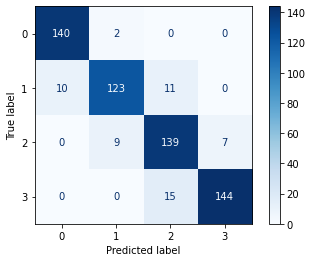


Accuracy: 
91.00%

Precision: 
91.18%

Recall: 
91.06%

F1 Score: 
91.04%


In [31]:
actual = df_validation['price_range']

def show_stat(actual,predicted):
    confusion_matrix = metrics.confusion_matrix(actual, predicted)
    cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix, display_labels=['0', '1', '2', '3'])
    cm_display.plot(cmap=plt.cm.Blues)
    plt.show()
    
    print(Fore.YELLOW + '\033[1m' + "\nAccuracy: " + '\033[0m')
    print(f"{metrics.accuracy_score(actual, predicted):.2%}")
    print(Fore.YELLOW + '\033[1m' + "\nPrecision: " + '\033[0m')
    print(f"{metrics.precision_score(actual, predicted, average='macro'):.2%}")
    print(Fore.YELLOW + '\033[1m' + "\nRecall: " + '\033[0m')
    print(f"{metrics.recall_score(actual, predicted, average='macro'):.2%}")
    print(Fore.YELLOW + '\033[1m' + "\nF1 Score: " + '\033[0m')
    print(f"{metrics.f1_score(actual, predicted, average='macro'):.2%}")

show_stat(actual, predicted)


/Users/putinabillaaidira/opt/anaconda3/lib/python3.9/site-packages/sklearn/neighbors/_classification.py:211: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)
/Users/putinabillaaidira/opt/anaconda3/lib/python3.9/site-packages/sklearn/neighbors/_classification.py:211: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the val


Best k value: 
9


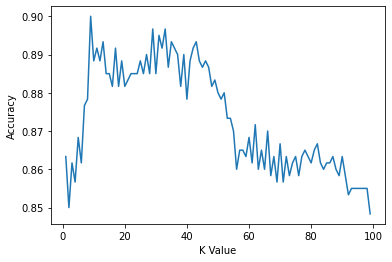


Predicted labels: 


,price_range
0,1
1,2
2,3
3,0
4,2
...,...
595,1
596,3
597,0
598,2


In [32]:
# Splitting Data
X_train = df_train.drop(columns=['price_range'])
y_train = df_train['price_range']

x_test = df_validation.drop(columns=['price_range'])
y_test = df_validation['price_range']

# Scale data
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
x_test = scaler.transform(x_test)

# Search best k value
k_range = range(1, 100)
scores = []
y_pred = []
max_score = -1
for k in k_range:
    knn_sci = KNeighborsClassifier(n_neighbors=k)
    knn_sci.fit(X_train, y_train)
    y_temp = knn_sci.predict(x_test)
    scores.append(accuracy_score(y_test, y_temp))
    if scores[-1] > max_score:
        max_score = scores[-1]
        y_pred = y_temp

print(Fore.YELLOW + '\033[1m' + "\nBest k value: " + '\033[0m')
print(f"{k_range[scores.index(max(scores))]}")

# plot k accuracy
import matplotlib.pyplot as plt
plt.plot(k_range, scores)
plt.xlabel('K Value')
plt.ylabel('Accuracy')
plt.show()

# Result
print(Fore.YELLOW + '\033[1m' + "\nPredicted labels: " + '\033[0m')
predicted_table = pd.DataFrame(y_pred, columns=['price_range'])
display(predicted_table)

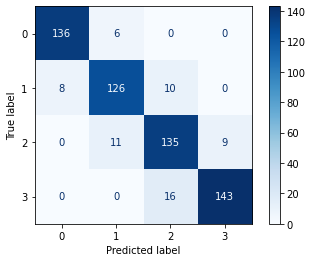


Accuracy: 
90.00%

Precision: 
90.12%

Recall: 
90.08%

F1 Score: 
90.08%


In [33]:
actual = y_test
predicted = y_pred

show_stat(actual, predicted)


In [34]:
import pickle

# save the model as a pickle file
knn_model_pkl_file = "knn_model.pkl"  

with open(knn_model_pkl_file, 'wb') as file:  
    pickle.dump(knn, file)

/var/folders/zw/ydvgj7zd1qv9dqdmyx9_07dh0000gn/T/ipykernel_50078/324423920.py:49: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  majority_class = stats.mode(k_neighbor_class)



Prediction Result: 


,price_range
0,1
1,2
2,3
3,0
4,2
...,...
595,1
596,3
597,0
598,2


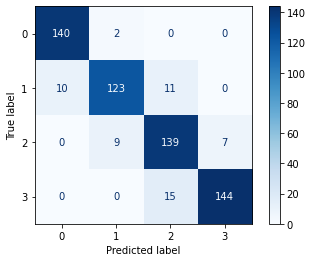


Accuracy: 
91.00%

Precision: 
91.18%

Recall: 
91.06%

F1 Score: 
91.04%


In [35]:
# load model from pickle file
knn_model_pkl_file = "knn_model.pkl"
with open(knn_model_pkl_file, 'rb') as file:  
    model = pickle.load(file)

# evaluate model 
predicted_labels = model.predict(df_validation, df_train)

# check results
print(Fore.YELLOW + '\033[1m' + "\nPrediction Result: " + '\033[0m')
predicted_table = pd.DataFrame(predicted_labels, columns=['price_range'])
display(predicted_table)
show_stat(actual, predicted_labels)